In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [80]:
df = pd.read_csv('data/grouped_data.csv')

In [81]:
df.head(5)

,gene_id,transcript_id,transcript_position,relative_position,fivemers,label,dwelling_time_min,dwelling_time_max,dwelling_time_mean,dwelling_time_median,...,mean_current_skew,order_1,order_2,order_3,order_4,order_5,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,511,1,ATAAC,0,0.00266,0.0169,0.007247,0.005990,...,0.591063,A,T,A,A,C,3,1,0,1
1,ENSG00000000003,ENST00000373020,512,2,TAACT,0,0.00232,0.0461,0.011177,0.007735,...,-0.177996,T,A,A,C,T,2,1,0,2
2,ENSG00000000003,ENST00000373020,513,3,AACTC,0,0.00266,0.0219,0.008500,0.006870,...,-3.353925,A,A,C,T,C,2,2,0,1
3,ENSG00000000003,ENST00000373020,688,1,TAAAC,0,0.00232,0.0279,0.009868,0.007640,...,-1.322034,T,A,A,A,C,3,1,0,1
4,ENSG00000000003,ENST00000373020,689,2,AAACA,0,0.00232,0.0179,0.007332,0.006420,...,-0.931646,A,A,A,C,A,4,1,0,0


In [82]:
len(df['fivemers'].unique())

66

In [83]:
df.shape

(365514, 33)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365514 entries, 0 to 365513
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gene_id               365514 non-null  object 
 1   transcript_id         365514 non-null  object 
 2   transcript_position   365514 non-null  int64  
 3   relative_position     365514 non-null  int64  
 4   fivemers              365514 non-null  object 
 5   label                 365514 non-null  int64  
 6   dwelling_time_min     365514 non-null  float64
 7   dwelling_time_max     365514 non-null  float64
 8   dwelling_time_mean    365514 non-null  float64
 9   dwelling_time_median  365514 non-null  float64
 10  dwelling_time_std     365514 non-null  float64
 11  dwelling_time_skew    365514 non-null  float64
 12  sd_current_min        365514 non-null  float64
 13  sd_current_max        365514 non-null  float64
 14  sd_current_mean       365514 non-null  float64
 15  

In [85]:
df.describe()

,transcript_position,relative_position,label,dwelling_time_min,dwelling_time_max,dwelling_time_mean,dwelling_time_median,dwelling_time_std,dwelling_time_skew,sd_current_min,...,mean_current_min,mean_current_max,mean_current_mean,mean_current_median,mean_current_std,mean_current_skew,count_A,count_C,count_G,count_T
count,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,...,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000,365514.000000
mean,1615.868407,2.000000,0.014979,0.002345,0.024947,0.007764,0.006592,0.004625,1.579478,1.611517,...,94.580259,109.671788,102.646318,102.752992,3.026898,-0.210321,2.169569,1.332548,0.921341,0.576542
std,1395.133950,0.816498,0.121468,0.000478,0.009412,0.001682,0.001541,0.001442,0.697225,0.805870,...,14.007864,16.032900,15.412760,15.577274,1.184796,0.907801,0.880328,0.524325,0.736789,0.648432
min,2.000000,1.000000,0.000000,0.001660,0.005980,0.003537,0.002660,0.000922,-0.617264,0.044000,...,61.000000,76.200000,72.231429,71.700000,0.531099,-5.269245,1.000000,1.000000,0.000000,0.000000
25%,673.000000,1.000000,0.000000,0.001990,0.018300,0.006555,0.005520,0.003600,1.111282,1.070000,...,83.100000,95.600000,89.258106,89.250000,2.173622,-0.774930,2.000000,1.000000,0.000000,0.000000
50%,1256.000000,2.000000,0.000000,0.002320,0.023200,0.007435,0.006310,0.004399,1.495026,1.400000,...,92.500000,108.000000,100.339898,100.000000,2.790958,-0.193065,2.000000,1.000000,1.000000,0.000000
75%,2139.000000,3.000000,0.000000,0.002480,0.029600,0.008651,0.007310,0.005412,1.939889,1.930000,...,106.000000,125.000000,117.654371,118.000000,3.648482,0.356033,3.000000,2.000000,1.000000,1.000000
max,18731.000000,3.000000,1.000000,0.009890,0.138000,0.021581,0.017900,0.020858,8.180598,8.230000,...,132.000000,156.000000,137.120000,137.000000,19.888538,9.193026,4.000000,3.000000,3.000000,2.000000


In [86]:
#Get non-numerical features.
non_num_cols = list(set(df.columns) - set(df.describe().columns))
print('Non-numerical features: ',non_num_cols)

Non-numerical features:  ['fivemers', 'order_1', 'order_4', 'transcript_id', 'gene_id', 'order_2', 'order_3', 'order_5']


In [109]:
# create list with categorical features' names
nonum_cols_names = ['order_4', 'order_2', 'order_1', 'fivemers', 'order_3', 'order_5', 'relative_position', 'transcript_position']

# create list with numerical features' names
num_cols_names = ['dwelling_time_min', 'dwelling_time_max', 'dwelling_time_mean', 'dwelling_time_median', 'dwelling_time_std', 
                  'dwelling_time_skew', 'sd_current_min', 'sd_current_max', 'sd_current_mean', 'sd_current_median', 'sd_current_std',
                  'sd_current_skew', 'mean_current_min', 'mean_current_max', 'mean_current_mean', 'mean_current_median', 'mean_current_std',
                  'mean_current_skew', 'count_A', 'count_C', 'count_G', 'count_T']

In [110]:
#Assign appropriate data type to categorical variables.
df[nonum_cols_names] = df[nonum_cols_names].astype('category')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365514 entries, 0 to 365513
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   gene_id               365514 non-null  object  
 1   transcript_id         365514 non-null  object  
 2   transcript_position   365514 non-null  category
 3   relative_position     365514 non-null  category
 4   fivemers              365514 non-null  category
 5   label                 365514 non-null  int64   
 6   dwelling_time_min     365514 non-null  float64 
 7   dwelling_time_max     365514 non-null  float64 
 8   dwelling_time_mean    365514 non-null  float64 
 9   dwelling_time_median  365514 non-null  float64 
 10  dwelling_time_std     365514 non-null  float64 
 11  dwelling_time_skew    365514 non-null  float64 
 12  sd_current_min        365514 non-null  float64 
 13  sd_current_max        365514 non-null  float64 
 14  sd_current_mean       365514 non-nul

In [209]:
df[df['label'] == 1].relative_position.unique()

[2]
Categories (3, int64): [1, 2, 3]

## Train-test split

In [112]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df, groups = df['gene_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [113]:
y_train = train['label']
X_train = train.drop(['label'], axis = 1)

y_test = test['label']
X_test = test.drop(['label'], axis = 1)

In [114]:
train_geneids = train['gene_id'].unique()
test_geneids = test['gene_id'].unique()

In [115]:
# check if any gene id in train set is present in test set
np.in1d(train_geneids, test_geneids).any()

False

# Drop gene_id and transcript_id columns

In [116]:
X_train_ids = X_train[['gene_id', 'transcript_id']]
X_train_clean = X_train.drop(columns=['gene_id', 'transcript_id'])

In [117]:
X_train_ids.shape

(294987, 2)

In [118]:
X_train_clean.shape

(294987, 30)

In [119]:
X_test_ids = X_test[['gene_id', 'transcript_id']]
X_test_clean = X_test.drop(columns=['gene_id', 'transcript_id'])

# Oversampling on train data

In [140]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 290578, 1: 4409})


<AxesSubplot:>

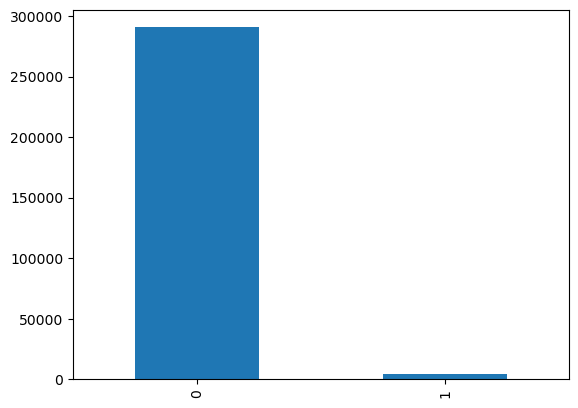

In [149]:
y_train.value_counts().plot(kind="bar")

In [150]:
y_train.value_counts()/len(y_train)

0    0.985054
1    0.014946
Name: label, dtype: float64

98.5% of training data consists of data with no m6a modification. Class imbalance!

In [124]:
cat_col_index = [df.columns.get_loc(c) for c in nonum_cols_names if c in df]

In [127]:
X_train_clean.head(5)

,transcript_position,relative_position,fivemers,dwelling_time_min,dwelling_time_max,dwelling_time_mean,dwelling_time_median,dwelling_time_std,dwelling_time_skew,sd_current_min,...,mean_current_skew,order_1,order_2,order_3,order_4,order_5,count_A,count_C,count_G,count_T
0,511,1,ATAAC,0.00266,0.0169,0.007247,0.005990,0.004404,1.084484,1.280,...,0.591063,A,T,A,A,C,3,1,0,1
1,512,2,TAACT,0.00232,0.0461,0.011177,0.007735,0.010835,2.080787,1.480,...,-0.177996,T,A,A,C,T,2,1,0,2
2,513,3,AACTC,0.00266,0.0219,0.008500,0.006870,0.005272,1.370120,0.917,...,-3.353925,A,A,C,T,C,2,2,0,1
3,688,1,TAAAC,0.00232,0.0279,0.009868,0.007640,0.006946,1.311306,1.160,...,-1.322034,T,A,A,A,C,3,1,0,1
4,689,2,AAACA,0.00232,0.0179,0.007332,0.006420,0.004067,0.880893,1.420,...,-0.931646,A,A,A,C,A,4,1,0,0


In [73]:
cat_col_index

[27, 25, 24, 4, 26, 28, 3]

In [181]:
# define oversampling strategy so that ratio of minority samples to majority samples is 1:2
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)

In [182]:
X_train_over, y_train_over = oversample.fit_resample(X_train_clean, y_train)

In [183]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 290578, 1: 145289})


In [184]:
y_train_over.value_counts()/len(y_train_over)

0    0.666667
1    0.333333
Name: label, dtype: float64

<AxesSubplot:>

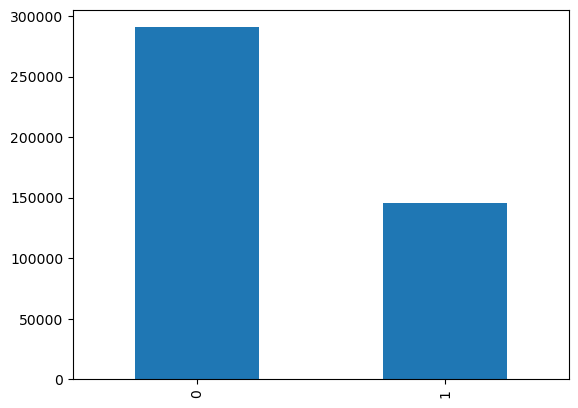

In [185]:
y_train_over.value_counts().plot(kind="bar")

In [186]:
# define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
under = RandomUnderSampler(sampling_strategy=0.75)
# fit and apply the transform
X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)

In [188]:
print('Resampled dataset shape %s' % Counter(y_train_under))

Resampled dataset shape Counter({0: 193718, 1: 145289})


In [189]:
y_train_under.value_counts()/len(y_train_under)

0    0.571428
1    0.428572
Name: label, dtype: float64

<AxesSubplot:>

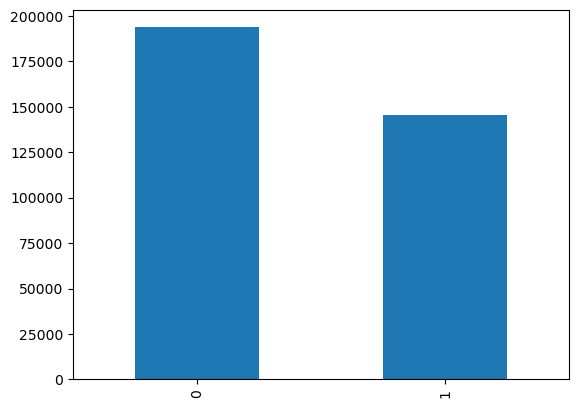

In [190]:
y_train_under.value_counts().plot(kind="bar")

In [191]:
X_train_under.head(5)

,transcript_position,relative_position,fivemers,dwelling_time_min,dwelling_time_max,dwelling_time_mean,dwelling_time_median,dwelling_time_std,dwelling_time_skew,sd_current_min,...,mean_current_skew,order_1,order_2,order_3,order_4,order_5,count_A,count_C,count_G,count_T
0,1317,2,GAACT,0.00309,0.0211,0.010658,0.011000,0.005176,0.306495,1.530,...,0.405568,G,A,A,C,T,2,1,1,1
1,613,2,TAACT,0.00199,0.0315,0.006189,0.005280,0.004016,3.009988,0.793,...,-0.810159,T,A,A,C,T,2,1,0,2
2,2898,1,GTAAC,0.00232,0.0236,0.006733,0.005310,0.005009,2.100542,1.310,...,0.102947,G,T,A,A,C,2,1,1,1
3,1322,2,AGACC,0.00232,0.0296,0.010026,0.008465,0.005871,1.133246,1.100,...,-0.070441,A,G,A,C,C,2,2,1,0
4,1999,3,GACCC,0.00232,0.0199,0.005859,0.004740,0.003567,2.373471,2.180,...,0.841011,G,A,C,C,C,1,3,1,0


In [195]:
y_train_under.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [200]:
X_train_final = X_train_under.copy()
y_train_final = y_train_under.copy()

X_test_final = X_test_clean.copy()
y_test_final = y_test.copy()

In [206]:
X_train_final.to_csv('X_train_final.csv')
X_test_final.to_csv('X_test_final.csv')

y_train_final.to_csv('y_train_final.csv')
y_test_final.to_csv('y_test_final.csv')